# Template Matching
https://docs.opencv.org/4.x/de/da9/tutorial_template_matching.html

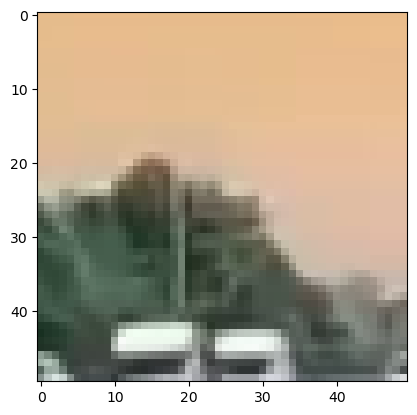

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
#¡Es muy intensivo en computo!
# Función de búsqueda para la mejor similitud de una imagen a una plantilla.
def find_matching(image, template):
    # Convierte a escala de grises
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    # Encuentra el alto y el ancho de la plantilla
    w, h = template_gray.shape[::-1]
    # Aplica la búsqueda de similitud de la imagen con la plantilla. Se le pasa la imagen, la plantilla y el método
    res = cv2.matchTemplate(image_gray, template_gray, cv2.TM_CCOEFF_NORMED)

    # Obtener la mejor correspondencia
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # Obtener la esquina superior izquierda de la región de mayor correspondencia
    top_left = max_loc
    # Obtener la esquina inferior derecha d la región de mayor correspondencia
    bottom_right = (top_left[0] + w, top_left[1] + h)
    # Dibujar un rectángulo circunscrito a la región de mayor correspondencia.
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    return image
    
    
# Función que obtiene una región de interés (ROI). En este caso corresponde a la región central de la imagen.
def get_roi(image, roi_size):
    # Obtener el tamaño de la imagen
    height, width = image.shape[:2]
    # Obtener el tamaño de la región de interés (ROI)
    roi_height, roi_width = roi_size
    # Calcular la región de la ROI.
    x = int((width - roi_width)/2)
    y = int((height - roi_height)/2)
    # Obtener el ROI de la imagen.
    roi = image[y:y+roi_height, x:x+roi_width]
    return roi


#cap = cv2.VideoCapture(1)
cap = cv2.VideoCapture("carretera.mp4")
retVal, frame = cap.read()

frame = cv2.resize(frame, (400, 300))
template = get_roi(frame, (50, 50))

# Mostrar la plantilla
plt.imshow(template)

while(1):
    # Coger cada frame
    retVal, frame = cap.read()
    if not retVal:
        break    
    frame = cv2.resize(frame, (400, 300))
    # Search for the template
    frame = find_matching(frame, template)
    # Show the image
    cv2.imshow('Imagen',frame)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
#release the frame
cap.release()

https://docs.opencv.org/4.8.0/d4/dc6/tutorial_py_template_matching.html